In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from rdflib import Graph, Namespace, URIRef, Literal
from rdflib.namespace import RDF, RDFS

# NetworkX - Graph-Based Knowledge Representation

APPROACH 1: NetworkX - Graph-Based Representation

Adding nodes with metadata...
  Added: python_basics (beginner)
  Added: data_structures (intermediate)
  Added: advanced_python (advanced)
  Added: machine_learning (advanced)
  Added: bioimage_analysis (advanced)

Adding prerequisite relationships...
  python_basics -> data_structures (weight: 1.0, type: prerequisite)
  data_structures -> advanced_python (weight: 0.8, type: prerequisite)
  advanced_python -> machine_learning (weight: 0.7, type: recommended)
  advanced_python -> bioimage_analysis (weight: 0.7, type: recommended)

------------------------------------------------------------
QUERY 1: Shortest Learning Path
------------------------------------------------------------
Path: python_basics -> data_structures -> advanced_python -> bioimage_analysis
Total estimated hours: 150

------------------------------------------------------------
QUERY 2: All Prerequisites for Machine Learning
------------------------------------------

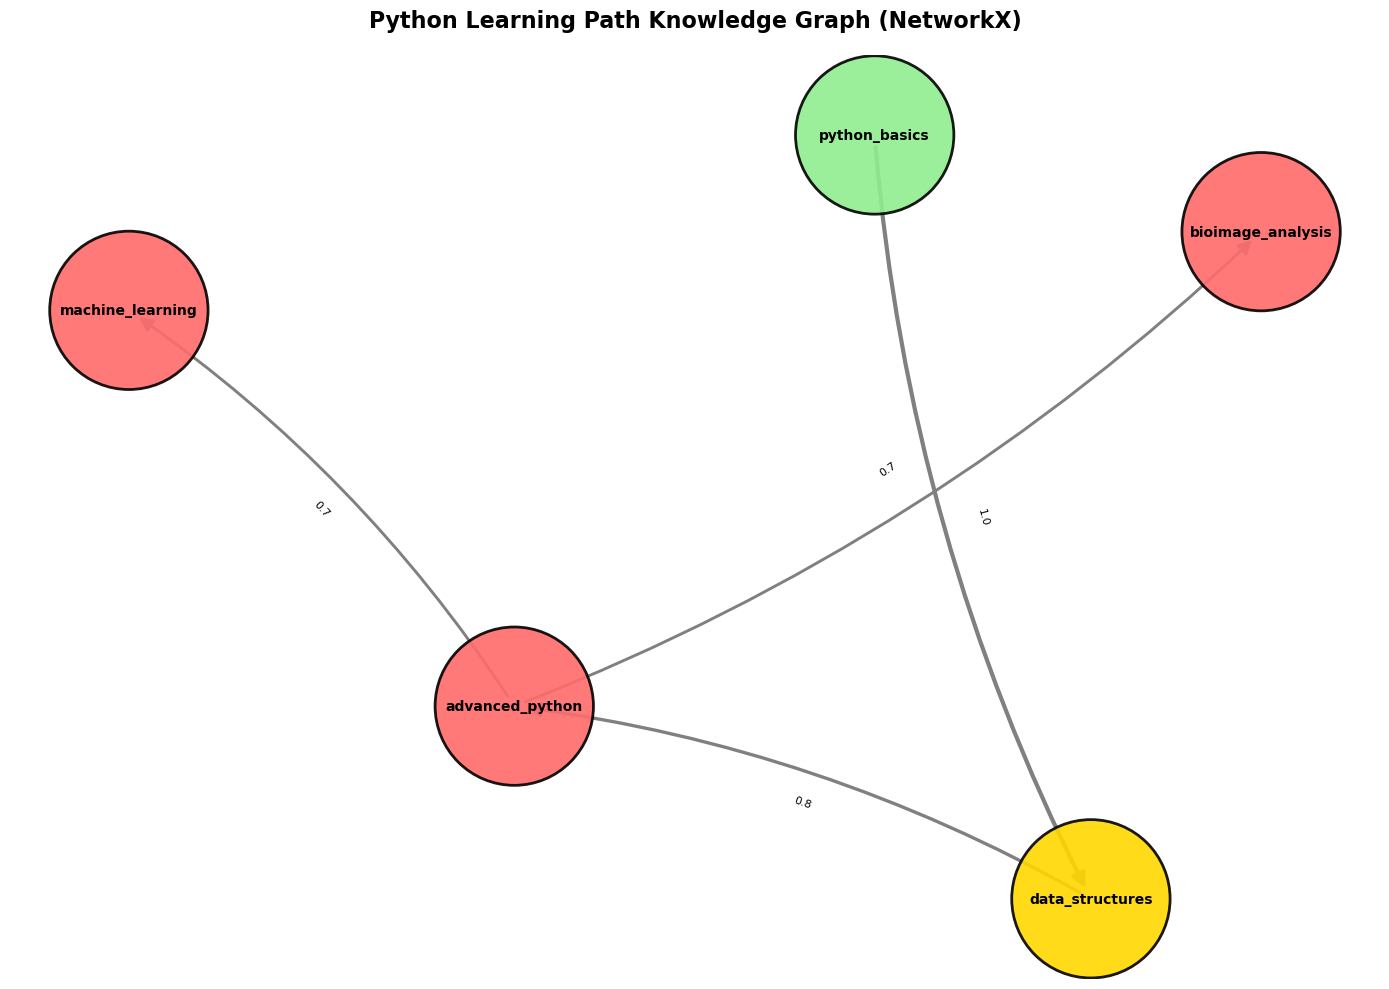

In [2]:
print("=" * 60)
print("APPROACH 1: NetworkX - Graph-Based Representation")
print("=" * 60)

# Create a directed graph (DiGraph)
# Directed means edges have direction: A -> B is different from B -> A
# This is perfect for representing prerequisites where order matters
G = nx.DiGraph()

# Define topics with metadata
# Each topic is a dictionary containing properties (metadata)
# This structure is flexible - you can add any properties you need
topics = {
    'python_basics': {
        'difficulty': 'beginner',  # Learning difficulty level
        'description': 'Basic Python concepts',  # Human-readable description
        'hours': 20,  # Estimated learning time in hours
        'category': 'fundamentals'  # Topic category
    },
    'data_structures': {
        'difficulty': 'intermediate',
        'description': 'Python data structures (lists, dicts, sets)',
        'hours': 30,
        'category': 'fundamentals'
    },
    'advanced_python': {
        'difficulty': 'advanced',
        'description': 'Advanced Python concepts (decorators, generators)',
        'hours': 40,
        'category': 'advanced'
    },
    'machine_learning': {
        'difficulty': 'advanced',
        'description': 'Machine Learning with Python (scikit-learn, pandas)',
        'hours': 80,
        'category': 'application'
    },
    'bioimage_analysis': {
        'difficulty': 'advanced',
        'description': 'Bioimage Analysis with Python (microscopy, segmentation)',
        'hours': 60,
        'category': 'application'
    }
}

# Add nodes to the graph with their metadata
# The ** operator unpacks the metadata dictionary as keyword arguments
# This creates nodes with attached properties that can be queried later
print("\nAdding nodes with metadata...")
for topic, metadata in topics.items():
    G.add_node(topic, **metadata)
    print(f"  Added: {topic} ({metadata['difficulty']})")

# Define relationships (edges) between topics
# Each edge represents a prerequisite relationship
# The weight indicates the strength/importance of the prerequisite (1.0 = essential)
relationships = [
    ('python_basics', 'data_structures', {'weight': 1.0, 'type': 'prerequisite'}),
    ('data_structures', 'advanced_python', {'weight': 0.8, 'type': 'prerequisite'}),
    ('advanced_python', 'machine_learning', {'weight': 0.7, 'type': 'recommended'}),
    ('advanced_python', 'bioimage_analysis', {'weight': 0.7, 'type': 'recommended'})
]

# Add all edges at once using add_edges_from
print("\nAdding prerequisite relationships...")
G.add_edges_from(relationships)
for src, tgt, attrs in relationships:
    print(f"  {src} -> {tgt} (weight: {attrs['weight']}, type: {attrs['type']})")

# QUERY 1: Find the shortest learning path
# This uses breadth-first search to find the minimum number of prerequisites
print("\n" + "-" * 60)
print("QUERY 1: Shortest Learning Path")
print("-" * 60)
shortest_path = nx.shortest_path(G, source='python_basics', target='bioimage_analysis')
print(f"Path: {' -> '.join(shortest_path)}")

# Calculate total estimated learning hours for this path
total_hours = sum(G.nodes[topic]['hours'] for topic in shortest_path)
print(f"Total estimated hours: {total_hours}")

# QUERY 2: Find all topics a learner should master for a target
# predecessors() returns all nodes that have edges pointing to the target
print("\n" + "-" * 60)
print("QUERY 2: All Prerequisites for Machine Learning")
print("-" * 60)
ml_prerequisites = list(nx.ancestors(G, 'machine_learning'))
print(f"Prerequisites: {', '.join(ml_prerequisites)}")

# QUERY 3: Find topics by difficulty level
print("\n" + "-" * 60)
print("QUERY 3: Topics by Difficulty")
print("-" * 60)
beginner_topics = [node for node, attrs in G.nodes(data=True) 
                   if attrs['difficulty'] == 'beginner']
advanced_topics = [node for node, attrs in G.nodes(data=True) 
                   if attrs['difficulty'] == 'advanced']
print(f"Beginner: {', '.join(beginner_topics)}")
print(f"Advanced: {', '.join(advanced_topics)}")

# QUERY 4: Calculate centrality (importance) of topics
# Degree centrality measures how many connections a node has
# Higher centrality = more important/central in the learning path
print("\n" + "-" * 60)
print("QUERY 4: Topic Importance (Degree Centrality)")
print("-" * 60)
centrality = nx.degree_centrality(G)
for topic, score in sorted(centrality.items(), key=lambda x: x[1], reverse=True):
    print(f"  {topic}: {score:.2f}")

# Visualize the knowledge graph
print("\nGenerating visualization...")
plt.figure(figsize=(14, 10))

# Use spring layout for automatic node positioning
# k parameter controls spacing between nodes (higher = more spread out)
pos = nx.spring_layout(G, k=2, iterations=50, seed=42)

# Color nodes by difficulty level
color_map = {
    'beginner': '#90EE90',    # Light green
    'intermediate': '#FFD700', # Gold
    'advanced': '#FF6B6B'      # Light red
}
node_colors = [color_map[G.nodes[node]['difficulty']] for node in G.nodes()]

# Draw nodes with colors based on difficulty
nx.draw_networkx_nodes(G, pos, node_color=node_colors, 
                       node_size=13000, alpha=0.9, 
                       edgecolors='black', linewidths=2)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Draw edges with varying thickness based on weight
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]
nx.draw_networkx_edges(G, pos, edge_color='gray', 
                       arrows=True, arrowsize=20, 
                       width=[w*3 for w in weights],  # Thicker = stronger prerequisite
                       connectionstyle='arc3,rad=0.1')  # Curved edges

# Add edge labels showing weights
edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8)

plt.title("Python Learning Path Knowledge Graph (NetworkX)", 
          fontsize=16, fontweight='bold', pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()

# RDFLib - Semantic Web Representation

In [6]:
# RDF EXPLAINED FROM SCRATCH
# ===========================

# Think of RDF as a way to represent knowledge using simple sentences.
# Every piece of information is broken into three parts: Subject, Predicate, Object

# Example in English:
# "Alice knows Bob"
# - Subject: Alice (who/what we're talking about)
# - Predicate: knows (the relationship/property)
# - Object: Bob (what the subject relates to)

# This is called a TRIPLE.

from rdflib import Graph, Namespace, URIRef, Literal
from rdflib.namespace import RDF, RDFS, XSD

## UNDERSTANDING URIs - THE ADDRESSES OF THINGS

In [7]:
# In RDF, everything needs a unique name (identifier).
# We use URIs (like web addresses) to name things.

# Think of URIs like mailing addresses - they uniquely identify something.

# Examples:
#   http://example.org/Alice        <- This identifies a person named Alice
#   http://example.org/knows        <- This identifies a relationship "knows"
#   http://example.org/age          <- This identifies a property "age"

# Why URIs? So different systems can talk about the same thing!
# If you and I both use http://example.org/Alice, we're talking about the SAME Alice.


# Create a namespace - think of it as a "base address" for our URIs
# Instead of writing http://example.org/Alice every time,
# we can write EX.Alice (where EX = http://example.org/)
EX = Namespace("http://example.org/")

# Let's see what these look like
print("Our namespace:", EX)
print("Alice's URI:", EX.Alice)  
print("Bob's URI:", EX.Bob)
print("The 'knows' relationship URI:", EX.knows)
print()

Our namespace: http://example.org/
Alice's URI: http://example.org/Alice
Bob's URI: http://example.org/Bob
The 'knows' relationship URI: http://example.org/knows



## CREATING YOUR FIRST TRIPLE

In [10]:
# Create an empty graph (like an empty database)
g = Graph()

# Let's represent: "Alice knows Bob"

# In RDF triple form:
#   Subject:   http://example.org/Alice
#   Predicate: http://example.org/knows  
#   Object:    http://example.org/Bob

# Add the triple to the graph
# g.add() takes a tuple of (Subject, Predicate, Object)
g.add((
    EX.Alice,    # Subject - WHO/WHAT we're talking about
    EX.knows,    # Predicate - the RELATIONSHIP
    EX.Bob       # Object - what Alice relates to
))

print("✓ Triple added to graph!")
print(f"  Graph now contains {len(g)} triple(s)")

✓ Triple added to graph!
  Graph now contains 1 triple(s)


## DIFFERENT TYPES OF OBJECTS - URIs vs LITERALS

In [13]:
# Objects in triples can be TWO types:

# 1. URI (another resource/thing):
#    Example: Alice knows Bob
#                         ^^^ relationship to another PERSON
   
# 2. LITERAL (actual data value like text, numbers):
#    Example: Alice's age is 30
#                            ^^ this is just a NUMBER, not another person

# URIs = References to other things
# Literals = Actual values (strings, numbers, dates)

# Let's add more information about Alice
print("Adding more triples about Alice...")
print()

# Alice's name (a text literal)
g.add((EX.Alice, EX.name, Literal("Alice Smith")))
print("✓ Triple: Alice → name → 'Alice Smith' (text)")

# Alice's age (a number literal)
g.add((EX.Alice, EX.age, Literal(30)))
print("✓ Triple: Alice → age → 30 (number)")

# Alice's email (a text literal)
g.add((EX.Alice, EX.email, Literal("alice@example.com")))
print("✓ Triple: Alice → email → 'alice@example.com' (text)")

# Alice works at a company (a URI - another resource)
g.add((EX.Alice, EX.worksAt, EX.TechCorp))
print("✓ Triple: Alice → worksAt → TechCorp (URI to another thing)")

print(f"\nGraph now contains {len(g)} triple(s)")

Adding more triples about Alice...

✓ Triple: Alice → name → 'Alice Smith' (text)
✓ Triple: Alice → age → 30 (number)
✓ Triple: Alice → email → 'alice@example.com' (text)
✓ Triple: Alice → worksAt → TechCorp (URI to another thing)

Graph now contains 5 triple(s)


## PREDEFINED VOCABULARIES - RDF, RDFS, XSD

In [14]:
# RDF comes with some STANDARD vocabularies that everyone uses.
# Think of them as "official" words that all RDF systems understand.

# Key vocabularies:

# 1. RDF (Basic RDF vocabulary)
#    http://www.w3.org/1999/02/22-rdf-syntax-ns#
   
#    RDF.type - Says what KIND of thing something is
#               Example: Alice is a Person
   
# 2. RDFS (RDF Schema - for describing structure)
#    http://www.w3.org/2000/01/rdf-schema#
   
#    RDFS.label - A human-readable name for something
#                 Example: Label for EX.Alice could be "Alice Smith"
   
#    RDFS.comment - A description/explanation
   
# 3. XSD (XML Schema Datatypes - for specific data types)
#    http://www.w3.org/2001/XMLSchema#
   
#    XSD.integer - For whole numbers
#    XSD.string - For text
#    XSD.date - For dates
#    XSD.boolean - For true/false

# WHY USE THESE?
# - Standardized: All RDF tools understand them
# - Interoperable: Your data works with other systems
# - Meaningful: They have defined semantics

print("\nLet's see these predefined vocabularies in action:")
print()

# Tell the graph that Alice is a Person (using RDF.type)
g.add((EX.Alice, RDF.type, EX.Person))
print("✓ Alice → RDF.type → Person")
print("  Meaning: Alice is classified as a Person")
print()

# Give Alice a human-readable label (using RDFS.label)
g.add((EX.Alice, RDFS.label, Literal("Alice Smith")))
print("✓ Alice → RDFS.label → 'Alice Smith'")
print("  Meaning: The human-readable name for this resource is 'Alice Smith'")
print()

# Add a comment/description (using RDFS.comment)
g.add((EX.Alice, RDFS.comment, Literal("A software engineer at TechCorp")))
print("✓ Alice → RDFS.comment → 'A software engineer at TechCorp'")
print("  Meaning: This is a description of Alice")
print()

# Add age with explicit datatype (using XSD.integer)
g.add((EX.Alice, EX.age, Literal(30, datatype=XSD.integer)))
print("✓ Alice → age → 30 (explicitly typed as integer)")
print("  Meaning: The age is specifically a whole number, not text")


Let's see these predefined vocabularies in action:

✓ Alice → RDF.type → Person
  Meaning: Alice is classified as a Person

✓ Alice → RDFS.label → 'Alice Smith'
  Meaning: The human-readable name for this resource is 'Alice Smith'

✓ Alice → RDFS.comment → 'A software engineer at TechCorp'
  Meaning: This is a description of Alice

✓ Alice → age → 30 (explicitly typed as integer)
  Meaning: The age is specifically a whole number, not text


## VISUALIZING TRIPLES - SEE THE CONNECTIONS

In [16]:
# Let's see ALL the triples where Alice is the subject.
# Remember: Each line is one piece of information about Alice.

# Query all triples where Alice is the subject
print("Triples about Alice:\n")
for subject, predicate, obj in g.triples((EX.Alice, None, None)):
    # None means "match anything"
    # So (EX.Alice, None, None) means "any triple where Alice is the subject"
    
    # Get the last part of the URI for readability
    pred_name = str(predicate).split('/')[-1].split('#')[-1]
    
    if isinstance(obj, URIRef):
        obj_display = str(obj).split('/')[-1]
        print(f"  Alice → {pred_name} → {obj_display} (URI)")
    else:
        print(f"  Alice → {pred_name} → '{obj}' (Literal)")

Triples about Alice:

  Alice → knows → Bob (URI)
  Alice → name → 'Alice Smith' (Literal)
  Alice → age → '30' (Literal)
  Alice → email → 'alice@example.com' (Literal)
  Alice → worksAt → TechCorp (URI)
  Alice → type → Person (URI)
  Alice → label → 'Alice Smith' (Literal)
  Alice → comment → 'A software engineer at TechCorp' (Literal)


## QUERYING WITH SPARQL - THE "WHY" AND "HOW"

In [17]:
# SPARQL is like SQL for RDF graphs.
# It finds PATTERNS in your triples.

# Basic SPARQL Structure:
# ┌─────────────────────────────────────┐
# │ SELECT ?variable1 ?variable2        │  ← What you want to get back
# │ WHERE {                             │
# │     ?variable1 predicate ?variable2 │  ← Pattern to match
# │ }                                   │
# └─────────────────────────────────────┘

# Variables start with ? or $
# They're like blanks that SPARQL fills in by matching patterns.

In [18]:
print("-" * 70)
print("QUERY 1: Simple - Find all people and their names")
print("-" * 70)

# Add Bob to the graph so we have more data
g.add((EX.Bob, RDF.type, EX.Person))
g.add((EX.Bob, RDFS.label, Literal("Bob Jones")))
g.add((EX.Bob, EX.age, Literal(25)))

query1 = """
PREFIX ex: <http://example.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?person ?name
WHERE {
    ?person rdf:type ex:Person .
    ?person rdfs:label ?name .
}
"""

print("What this query does:")
print("1. PREFIX lines: Define shortcuts (ex: instead of http://example.org/)")
print("2. SELECT: We want to find the ?person and their ?name")
print("3. WHERE clause has TWO patterns to match:")
print("   - ?person rdf:type ex:Person  ← Find things that are Persons")
print("   - ?person rdfs:label ?name    ← Get their label (name)")
print()
print("Think of ? variables as blanks to fill in:")
print("  _____ is a Person AND _____ has a label _____")
print("  SPARQL tries to fill these blanks from your graph!")
print()
print("Results:")

for row in g.query(query1):
    print(f"  Person: {row.person}")
    print(f"  Name: {row.name}")
    print()

----------------------------------------------------------------------
QUERY 1: Simple - Find all people and their names
----------------------------------------------------------------------
What this query does:
1. PREFIX lines: Define shortcuts (ex: instead of http://example.org/)
2. SELECT: We want to find the ?person and their ?name
3. WHERE clause has TWO patterns to match:
   - ?person rdf:type ex:Person  ← Find things that are Persons
   - ?person rdfs:label ?name    ← Get their label (name)

Think of ? variables as blanks to fill in:
  _____ is a Person AND _____ has a label _____
  SPARQL tries to fill these blanks from your graph!

Results:
  Person: http://example.org/Alice
  Name: Alice Smith

  Person: http://example.org/Bob
  Name: Bob Jones



In [19]:
print("-" * 70)
print("QUERY 2: With FILTER - Find people older than 26")
print("-" * 70)

query2 = """
PREFIX ex: <http://example.org/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?name ?age
WHERE {
    ?person rdfs:label ?name .
    ?person ex:age ?age .
    FILTER(?age > 26)
}
"""

print("What's new here:")
print("- FILTER: Like SQL's WHERE clause, it filters results")
print("- ?age > 26: Only keep results where age is greater than 26")
print()
print("The pattern matching process:")
print("1. Find anyone with a label → ?person and ?name")
print("2. Get their age → ?age")
print("3. Keep only if age > 26")
print()
print("Results:")

for row in g.query(query2):
    print(f"  {row.name} is {row.age} years old")

----------------------------------------------------------------------
QUERY 2: With FILTER - Find people older than 26
----------------------------------------------------------------------
What's new here:
- FILTER: Like SQL's WHERE clause, it filters results
- ?age > 26: Only keep results where age is greater than 26

The pattern matching process:
1. Find anyone with a label → ?person and ?name
2. Get their age → ?age
3. Keep only if age > 26

Results:
  Alice Smith is 30 years old


In [20]:
print("-" * 70)
print("QUERY 3: Relationships - Who knows whom?")
print("-" * 70)

query3 = """
PREFIX ex: <http://example.org/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?person1_name ?person2_name
WHERE {
    ?person1 ex:knows ?person2 .
    ?person1 rdfs:label ?person1_name .
    ?person2 rdfs:label ?person2_name .
}
"""

print("This query finds CONNECTIONS between people:")
print("1. ?person1 ex:knows ?person2  ← Find 'knows' relationships")
print("2. Get the label (name) for person1")
print("3. Get the label (name) for person2")
print()
print("It's like asking: 'Show me all A→knows→B relationships")
print("                   and give me their actual names'")
print()
print("Results:")

for row in g.query(query3):
    print(f"  {row.person1_name} knows {row.person2_name}")

----------------------------------------------------------------------
QUERY 3: Relationships - Who knows whom?
----------------------------------------------------------------------
This query finds CONNECTIONS between people:
1. ?person1 ex:knows ?person2  ← Find 'knows' relationships
2. Get the label (name) for person1
3. Get the label (name) for person2

It's like asking: 'Show me all A→knows→B relationships
                   and give me their actual names'

Results:
  Alice Smith knows Bob Jones


In [24]:
print("=" * 70)
print("PART 7: Real Example - Course Prerequisites")
print("=" * 70)

# Create a fresh graph for courses
courses_graph = Graph()
COURSE = Namespace("http://university.edu/courses/")
courses_graph.bind("course", COURSE)

print("Let's build a course prerequisite system...\n")

# Define courses
courses = {
    "Python101": {"title": "Intro to Python", "credits": 3, "difficulty": "beginner"},
    "Python201": {"title": "Intermediate Python", "credits": 3, "difficulty": "intermediate"},
    "DataScience301": {"title": "Data Science", "credits": 4, "difficulty": "advanced"}
}

# Add courses to graph
for course_id, info in courses.items():
    course_uri = COURSE[course_id]
    
    # Say it's a Course
    courses_graph.add((course_uri, RDF.type, COURSE.Course))
    
    # Add properties
    courses_graph.add((course_uri, RDFS.label, Literal(course_id)))
    courses_graph.add((course_uri, COURSE.title, Literal(info["title"])))
    courses_graph.add((course_uri, COURSE.credits, Literal(info["credits"], datatype=XSD.integer)))
    courses_graph.add((course_uri, COURSE.difficulty, Literal(info["difficulty"])))
    
    print(f"✓ Added course: {course_id} - {info['title']}")

# Add prerequisites
print("\nAdding prerequisites...")
courses_graph.add((COURSE.Python201, COURSE.requires, COURSE.Python101))
print("✓ Python201 requires Python101")

courses_graph.add((COURSE.DataScience301, COURSE.requires, COURSE.Python201))
print("✓ DataScience301 requires Python201")

print(f"\nTotal triples in graph: {len(courses_graph)}")
print()

# Query: Find all prerequisites for Data Science
print("-" * 70)
print("QUERY: What are ALL prerequisites for Data Science?")
print("-" * 70)

query_prereqs = """
PREFIX course: <http://university.edu/courses/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?prereq_name ?title
WHERE {
    course:DataScience301 course:requires+ ?prereq .
    ?prereq rdfs:label ?prereq_name .
    ?prereq course:title ?title .
}
"""

for row in courses_graph.query(query_prereqs):
    print(f"  {row.prereq_name}: {row.title}")

print()

PART 7: Real Example - Course Prerequisites
Let's build a course prerequisite system...

✓ Added course: Python101 - Intro to Python
✓ Added course: Python201 - Intermediate Python
✓ Added course: DataScience301 - Data Science

Adding prerequisites...
✓ Python201 requires Python101
✓ DataScience301 requires Python201

Total triples in graph: 17

----------------------------------------------------------------------
QUERY: What are ALL prerequisites for Data Science?
----------------------------------------------------------------------
  Python201: Intermediate Python
  Python101: Intro to Python



# WHY RDF? THE BIG PICTURE

In [25]:
# RDF might seem complex, but here's why it's powerful:

# 1. STANDARDIZED
#    - Everyone uses the same format (triples)
#    - Your data works with other people's data automatically
   
# 2. FLEXIBLE
#    - Add new properties anytime without changing structure
#    - No rigid tables or schemas needed upfront
   
# 3. LINKED DATA
#    - You can reference things from other knowledge bases
#    - Example: Link your Alice to the Wikipedia Alice
   
# 4. SEMANTIC REASONING
#    - Computers can infer new facts from existing ones
#    - Example: If Alice knows Bob, and Bob knows Carol,
#              the system can infer Alice might want to meet Carol
   
# 5. POWERFUL QUERYING
#    - SPARQL can find complex patterns
#    - Example: "Find all friends of friends who like Python"
   
# Real-world uses:
# - Google Knowledge Graph (powers search results)
# - DBpedia (Wikipedia as RDF)
# - Schema.org (structured data for websites)
# - Medical ontologies (drug interactions, diseases)
# - Scientific research (linking datasets)

# The Key Insight:
# RDF breaks knowledge into tiny pieces (triples) that can be
# mixed, matched, and reasoned about by computers!

# CHEAT SHEET

In [27]:
# CREATING TRIPLES:
#   g.add((subject, predicate, object))
  
#   subject: Always a URI
#   predicate: Always a URI (the relationship)
#   object: Can be URI or Literal

# COMMON PREDICATES:
#   RDF.type        - What kind of thing is it? (Person, Course, etc.)
#   RDFS.label      - Human-readable name
#   RDFS.comment    - Description
  
# LITERALS WITH DATATYPES:
#   Literal("text")                           - Plain text
#   Literal(42, datatype=XSD.integer)         - Integer
#   Literal(3.14, datatype=XSD.float)         - Float
#   Literal("2024-01-01", datatype=XSD.date)  - Date

# SPARQL BASICS:
#   PREFIX ex: <http://example.org/>     - Define shortcut
#   SELECT ?var1 ?var2                   - What to return
#   WHERE { ?var1 predicate ?var2 }      - Pattern to match
#   FILTER(?var > 10)                    - Filter results
  
# PATTERN MATCHING:
#   ?x ?y ?z          - Match anything (variables)
#   ex:Alice ?y ?z    - Match triples about Alice
#   ?x ex:knows ?z    - Match 'knows' relationships
  
# PATH EXPRESSIONS:
#   ex:requires+      - One or more steps (transitive)
#   ex:requires*      - Zero or more steps (reflexive transitive)
#   ex:requires?      - Zero or one step (optional)

In [26]:
# Create an RDF graph
# RDF (Resource Description Framework) is a W3C standard for knowledge representation
# Everything in RDF is expressed as triples: (Subject, Predicate, Object)
g = Graph()

# Define custom namespace for our ontology
# Namespaces prevent naming conflicts and enable linking to external knowledge bases
EX = Namespace("http://example.org/learning/")
g.bind("ex", EX)  # Bind prefix for cleaner serialization

print("\nBuilding RDF graph with triples...")

topics = {
    'python_basics': {
        'difficulty': 'beginner',  # Learning difficulty level
        'description': 'Basic Python concepts',  # Human-readable description
        'hours': 20,  # Estimated learning time in hours
        'category': 'fundamentals'  # Topic category
    },
    'data_structures': {
        'difficulty': 'intermediate',
        'description': 'Python data structures (lists, dicts, sets)',
        'hours': 30,
        'category': 'fundamentals'
    },
    'advanced_python': {
        'difficulty': 'advanced',
        'description': 'Advanced Python concepts (decorators, generators)',
        'hours': 40,
        'category': 'advanced'
    },
    'machine_learning': {
        'difficulty': 'advanced',
        'description': 'Machine Learning with Python (scikit-learn, pandas)',
        'hours': 80,
        'category': 'application'
    },
    'bioimage_analysis': {
        'difficulty': 'advanced',
        'description': 'Bioimage Analysis with Python (microscopy, segmentation)',
        'hours': 60,
        'category': 'application'
    }
}

# Add topics and metadata as RDF triples
# Each property becomes a separate triple in the graph
for topic, metadata in topics.items():
    topic_uri = EX[topic]  # Create unique URI for the topic
    
    # Triple 1: Type declaration (what kind of thing this is)
    g.add((topic_uri, RDF.type, EX.Topic))
    
    # Triple 2: Human-readable label
    g.add((topic_uri, RDFS.label, Literal(topic)))
    
    # Triple 3: Difficulty level
    g.add((topic_uri, EX.difficulty, Literal(metadata['difficulty'])))
    
    # Triple 4: Description
    g.add((topic_uri, EX.description, Literal(metadata['description'])))
    
    # Triple 5: Learning hours (with datatype for proper numeric handling)
    g.add((topic_uri, EX.hours, Literal(metadata['hours'], datatype=URIRef("http://www.w3.org/2001/XMLSchema#integer"))))
    
    # Triple 6: Category
    g.add((topic_uri, EX.category, Literal(metadata['category'])))
    
    print(f"  Added topic: {topic} ({len(list(g.triples((topic_uri, None, None))))} triples)")

# Add prerequisite relationships
print("\nAdding prerequisite relationships...")
for src, tgt, weight in [
    ('python_basics', 'data_structures', 1.0),
    ('data_structures', 'advanced_python', 0.8),
    ('advanced_python', 'machine_learning', 0.7),
    ('advanced_python', 'bioimage_analysis', 0.7)
]:
    # Triple for the relationship itself
    g.add((EX[src], EX.requires, EX[tgt]))
    
    # Triple for the relationship weight
    # We create a unique predicate for each relationship
    weight_predicate = EX[f'weight_to_{tgt}']
    g.add((EX[src], weight_predicate, Literal(weight)))
    
    print(f"  {src} requires {tgt} (weight: {weight})")

print(f"\nTotal triples in graph: {len(g)}")

# =============================================================================
# SPARQL QUERIES - Querying the RDF Graph
# =============================================================================
# SPARQL is the query language for RDF, similar to SQL for databases
# It's powerful for pattern matching across semantic data

# QUERY 1: Find all topics with their difficulty levels
print("\n" + "-" * 60)
print("SPARQL QUERY 1: All Topics and Difficulties")
print("-" * 60)
query1 = """
PREFIX ex: <http://example.org/learning/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?topic ?label ?difficulty ?hours
WHERE {
    ?topic a ex:Topic .                  # Find all things of type Topic
    ?topic rdfs:label ?label .           # Get their labels
    ?topic ex:difficulty ?difficulty .   # Get difficulty level
    ?topic ex:hours ?hours .             # Get estimated hours
}
ORDER BY ?difficulty ?label              # Sort by difficulty, then name
"""

for row in g.query(query1):
    print(f"  {row.label}: {row.difficulty} ({row.hours} hours)")

# QUERY 2: Find all prerequisites for a specific topic
print("\n" + "-" * 60)
print("SPARQL QUERY 2: Prerequisites for Machine Learning")
print("-" * 60)
query2 = """
PREFIX ex: <http://example.org/learning/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?prerequisite ?label
WHERE {
    ?prerequisite ex:requires* ex:machine_learning .  # * means zero or more steps
    ?prerequisite rdfs:label ?label .
    FILTER(?prerequisite != ex:machine_learning)       # Exclude the topic itself
}
"""

for row in g.query(query2):
    print(f"  - {row.label}")

# QUERY 3: Find topics by difficulty with hours
print("\n" + "-" * 60)
print("SPARQL QUERY 3: Advanced Topics with Learning Time")
print("-" * 60)
query3 = """
PREFIX ex: <http://example.org/learning/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?label ?hours ?description
WHERE {
    ?topic ex:difficulty "advanced" .
    ?topic rdfs:label ?label .
    ?topic ex:hours ?hours .
    ?topic ex:description ?description .
}
ORDER BY DESC(?hours)  # Sort by hours descending
"""

for row in g.query(query3):
    print(f"  {row.label}: {row.hours} hours")
    print(f"    Description: {row.description}\n")

# QUERY 4: Calculate total hours for a learning path
print("\n" + "-" * 60)
print("SPARQL QUERY 4: Total Hours for Prerequisites")
print("-" * 60)
query4 = """
PREFIX ex: <http://example.org/learning/>

SELECT (SUM(?hours) as ?total_hours)
WHERE {
    ?topic ex:requires* ex:bioimage_analysis .
    ?topic ex:hours ?hours .
}
"""

for row in g.query(query4):
    print(f"  Total learning hours: {row.total_hours}")

# =============================================================================
# SERIALIZE AND EXPORT
# =============================================================================
print("\n" + "-" * 60)
print("RDF GRAPH SERIALIZATION (Turtle Format)")
print("-" * 60)
print("\nTurtle format is human-readable and commonly used for RDF")
print("Each line represents a triple: Subject Predicate Object .")
print("-" * 60)

# Serialize to Turtle format (concise and readable)
turtle_output = g.serialize(format="turtle")
print(turtle_output)

# You can also serialize to other formats:
# - "xml" : RDF/XML format
# - "json-ld" : JSON-LD format (good for web APIs)
# - "n3" : Notation3 format (supports more features)


Building RDF graph with triples...
  Added topic: python_basics (6 triples)
  Added topic: data_structures (6 triples)
  Added topic: advanced_python (6 triples)
  Added topic: machine_learning (6 triples)
  Added topic: bioimage_analysis (6 triples)

Adding prerequisite relationships...
  python_basics requires data_structures (weight: 1.0)
  data_structures requires advanced_python (weight: 0.8)
  advanced_python requires machine_learning (weight: 0.7)
  advanced_python requires bioimage_analysis (weight: 0.7)

Total triples in graph: 38

------------------------------------------------------------
SPARQL QUERY 1: All Topics and Difficulties
------------------------------------------------------------
  advanced_python: advanced (40 hours)
  bioimage_analysis: advanced (60 hours)
  machine_learning: advanced (80 hours)
  python_basics: beginner (20 hours)
  data_structures: intermediate (30 hours)

------------------------------------------------------------
SPARQL QUERY 2: Prerequi

In [4]:
# NetworkX Advantages:
#   ✓ Simpler to learn and use
#   ✓ Great built-in graph algorithms (shortest path, centrality, etc.)
#   ✓ Excellent visualization tools
#   ✓ Flexible metadata storage
#   ✓ Fast for graph traversal operations
#   ✓ Perfect for isolated applications

# RDFLib Advantages:
#   ✓ Standardized format (W3C RDF)
#   ✓ Powerful SPARQL query language
#   ✓ Interoperable with other semantic web tools
#   ✓ Can link to external knowledge bases (Linked Open Data)
#   ✓ Better for sharing data across systems
#   ✓ Supports reasoning and inference (with additional tools)
#   ✓ Ideal for semantic web and AI applications

# Use NetworkX when:
#   - Building internal applications
#   - Need graph algorithms and analysis
#   - Working only in Python
#   - Prioritizing simplicity

# Use RDFLib when:
#   - Building semantic web applications
#   - Need data interoperability
#   - Linking to external knowledge graphs
#   - Require complex queries (SPARQL)
#   - Building AI systems with reasoning capabilities